# Environment setup

## Google Drive mount
I'm using Google Colaboratory as my default platform, therefore I need to set up my environment to integrate it with Google Drive. You can skip this bit if you're working locally.

1. Mount Google Drive on the runtime to be able to read and write files. This will ask you to log in to your Google Account and provide an authorization code.
2. Create a symbolic link to a working directory 
3. Change the directory to the one where I cloned my repository.


In [ ]:
# mount Google Drive on the runtime
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
# create a symbolic link to a working directory
!ln -s /content/gdrive/My\ Drive/Colab\ Notebooks/sound_classifier /mydrive

# navigate to the working directory
%cd /mydrive

ln: failed to create symbolic link '/mydrive/sound_classifier': File exists
/content/gdrive/My Drive/Colab Notebooks/sound_classifier


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import os
from os.path import basename
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
import IPython.display as display
import tqdm.notebook as tq

In [ ]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.7/dist-packages (2.3.0)


In [ ]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.vision import *
from fastai.vision.all import *

2.3.0


# Dataset
Environment Sound Classification

## Import

In [ ]:
# !git clone https://github.com/karolpiczak/ESC-50.git

In [ ]:
# path to csv file containing meta data for the dataset
META_CSV = './ESC-50/meta/esc50.csv'

# path to folder containing audio files
AUDIO_PATH = './ESC-50/audio/'

In [ ]:
df = pd.read_csv(META_CSV)
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


# Classificator

In [ ]:
path = Path('./ESC-50/spectogram/')
path
# data = ImageDataBunch.from_df()

Path('ESC-50/spectogram')

In [ ]:
# for filename in tq.tqdm(df['filename']):
#   fold = int(filename[0])
#   if fold in [1, 2, 3]:
#     copy to train
#   elif fold == 4:
#     copy to valid
#   elif fold == 5:
#     copy to test

In [ ]:
files = get_image_files(path)
len(files)

2000

In [ ]:
files[0].name

'3-151557-A-28.png'

In [ ]:
pat = r'.-(\d+).png'

In [ ]:
# for fname in os.listdir(path):
#   name = fname.split('.')[0]
#   if name.endswith('(1)'):
#     print(os.path.join(path, fname))
    # os.remove(os.path.join(path, fname))

In [ ]:
path.ls()

(#2001) [Path('ESC-50/spectogram/3-151557-A-28.png'),Path('ESC-50/spectogram/3-151557-B-28.png'),Path('ESC-50/spectogram/3-152007-A-20.png'),Path('ESC-50/spectogram/3-152007-B-20.png'),Path('ESC-50/spectogram/3-152007-C-20.png'),Path('ESC-50/spectogram/3-152007-D-20.png'),Path('ESC-50/spectogram/3-152007-E-20.png'),Path('ESC-50/spectogram/3-152020-A-36.png'),Path('ESC-50/spectogram/3-152020-B-36.png'),Path('ESC-50/spectogram/3-152020-C-36.png')...]

In [ ]:
dls = ImageDataLoaders.from_name_re(
    path,
    files,
    pat,
    item_tfms=Resize(224)
    )

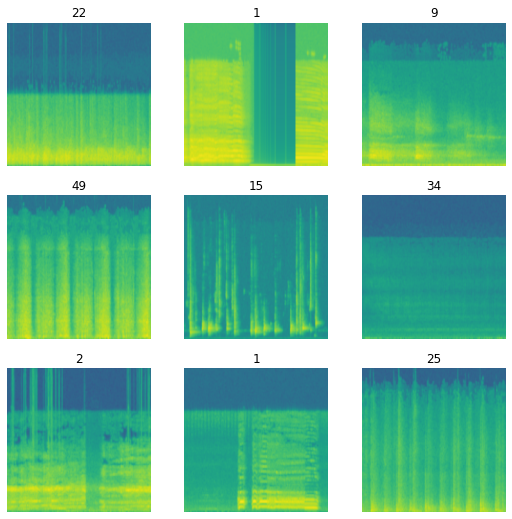

In [ ]:
dls.show_batch()

In [ ]:
dls.train

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# learn.lr_find()

In [ ]:
# learn.fine_tune(2, 3e-3)
learn.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,4.860723,3.379767,0.827500,10:50


epoch,train_loss,valid_loss,error_rate,time
0,2.893975,2.335445,0.617500,14:35
1,2.337155,1.835759,0.450000,14:38
2,1.904800,1.677141,0.407500,14:30
3,1.501051,1.605284,0.410000,14:28
4,1.150545,1.442782,0.345000,14:35
5,0.903266,1.376601,0.322500,14:32


epoch,train_loss,valid_loss,error_rate,time
0,2.893975,2.335445,0.617500,14:35
1,2.337155,1.835759,0.450000,14:38
2,1.904800,1.677141,0.407500,14:30
3,1.501051,1.605284,0.410000,14:28
4,1.150545,1.442782,0.345000,14:35
5,0.903266,1.376601,0.322500,14:32
6,0.704046,1.387489,0.320000,14:29


KeyboardInterrupt: ignored

epoch,train_loss,valid_loss,error_rate,time
0,2.893975,2.335445,0.617500,14:35
1,2.337155,1.835759,0.450000,14:38
2,1.904800,1.677141,0.407500,14:30
3,1.501051,1.605284,0.410000,14:28
4,1.150545,1.442782,0.345000,14:35
5,0.903266,1.376601,0.322500,14:32
6,0.704046,1.387489,0.320000,14:29


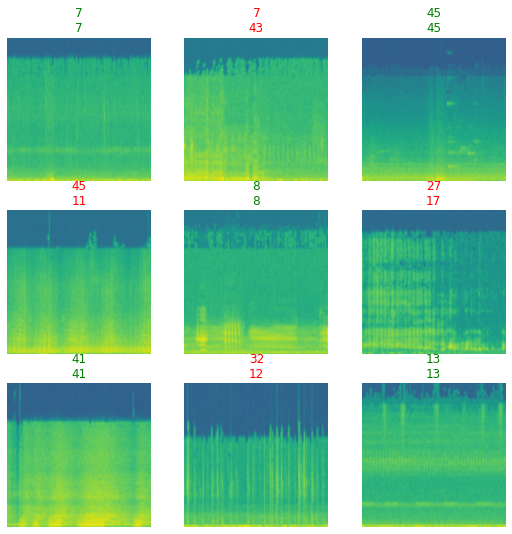

In [ ]:
learn.show_results()

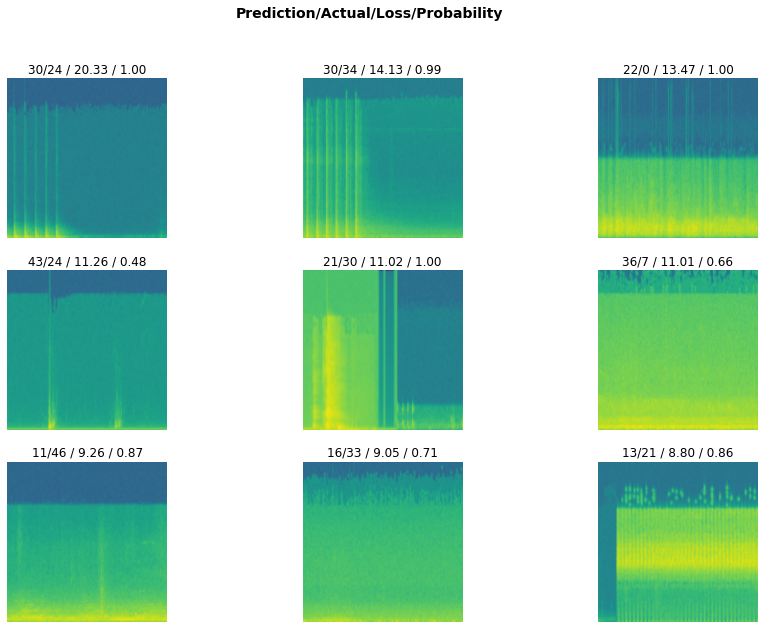

In [ ]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

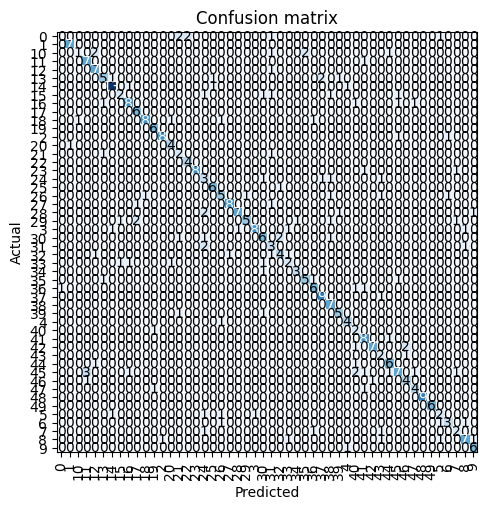

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5), dpi=100)

In [ ]:
interp.print_classification_report()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.88      1.00      0.93         7
          10       0.50      0.14      0.22         7
          11       0.64      0.88      0.74         8
          12       0.64      0.88      0.74         8
          13       0.62      0.50      0.56        10
          14       0.81      0.81      0.81        16
          15       0.50      0.29      0.36         7
          16       0.73      0.67      0.70        12
          17       0.67      1.00      0.80         6
          18       0.89      0.67      0.76        12
          19       0.75      1.00      0.86         6
           2       0.89      0.80      0.84        10
          20       0.67      0.80      0.73         5
          21       0.33      0.50      0.40         4
          22       0.67      1.00      0.80         4
          23       1.00      0.80      0.89        10
          24       0.27    

In [ ]:
interp.most_confused()

[('45', '11', 3),
 ('0', '21', 2),
 ('0', '22', 2),
 ('10', '12', 2),
 ('10', '35', 2),
 ('13', '37', 2),
 ('28', '24', 2),
 ('29', '17', 2),
 ('30', '32', 2),
 ('31', '24', 2),
 ('42', '46', 2),
 ('45', '40', 2),
 ('0', '31', 1),
 ('0', '5', 1),
 ('10', '31', 1),
 ('10', '44', 1),
 ('11', '41', 1),
 ('12', '31', 1),
 ('13', '14', 1),
 ('13', '25', 1),
 ('13', '39', 1),
 ('14', '16', 1),
 ('14', '25', 1),
 ('14', '4', 1),
 ('15', '24', 1),
 ('15', '30', 1),
 ('15', '31', 1),
 ('15', '38', 1),
 ('15', '45', 1),
 ('16', '13', 1),
 ('16', '40', 1),
 ('16', '45', 1),
 ('16', '47', 1),
 ('18', '10', 1),
 ('18', '20', 1),
 ('18', '26', 1),
 ('18', '36', 1),
 ('2', '45', 1),
 ('2', '6', 1),
 ('20', '1', 1),
 ('21', '13', 1),
 ('21', '31', 1),
 ('23', '41', 1),
 ('23', '7', 1),
 ('24', '30', 1),
 ('24', '37', 1),
 ('24', '38', 1),
 ('24', '43', 1),
 ('25', '32', 1),
 ('26', '18', 1),
 ('26', '29', 1),
 ('26', '38', 1),
 ('26', '43', 1),
 ('26', '6', 1),
 ('27', '17', 1),
 ('27', '31', 1),
 ('2